<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E10-TwitterNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Network Analysis
This notebook contains a social network analysis mainly executed with the library of NetworkX. In detail, this dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks. The dataset can be found at this link: [Stanford Twitter Dataset](https://snap.stanford.edu/data/ego-Twitter.html).

## Import packages

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Analysis
The edges are loaded from the `data` folder and saved in a dataframe. Each edge is a new row and for each edge there is a `start_node` and an `end_node` column

In [3]:
twitter = pd.read_csv(
    "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
twitter = twitter.iloc[:80000]

The graph is created from the `twitter` dataframe of the edges:

In [206]:
G = nx.from_pandas_edgelist(twitter, "start_node", "end_node")

## Visualizing the graph

Let's start our exploration by visualizing the graph. Visualization plays a
central role in exploratory data analysis to help get a qualitative feel for
the data.

Since we don't have any real sense of structure in the data, let's start by
viewing the graph with `random_layout`, which is among the fastest of the layout
functions.

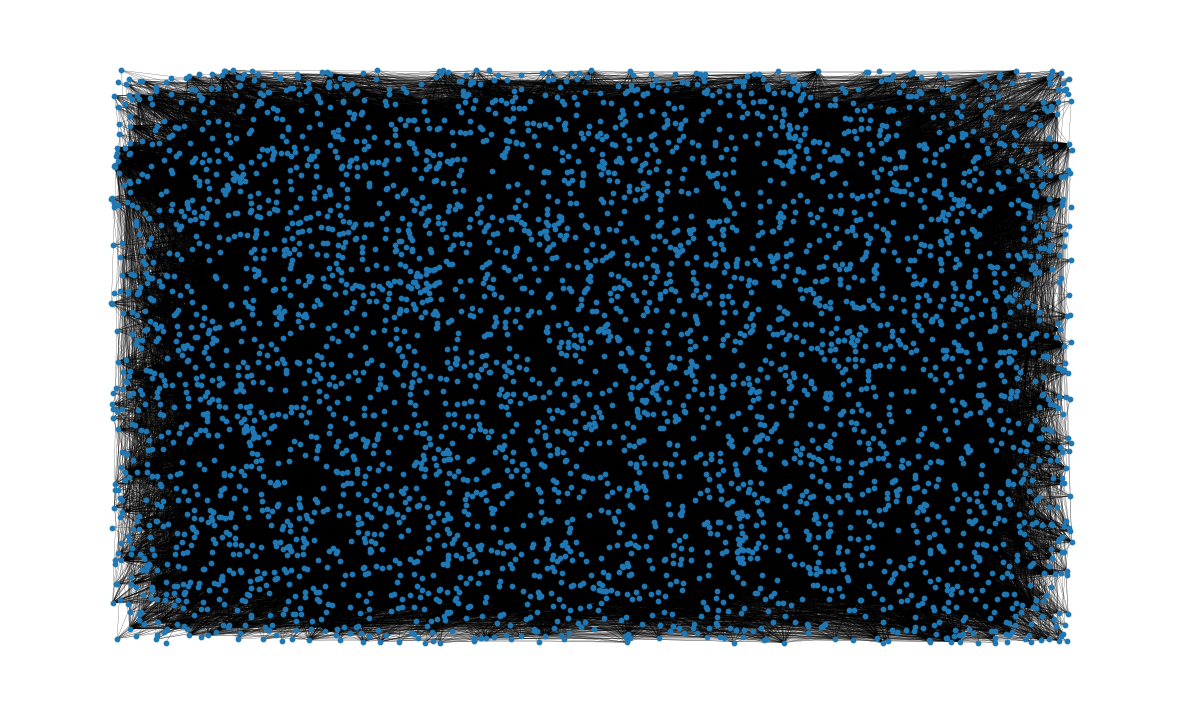

In [5]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Do we need more or less information (nodes or edges) from the graph to do the analysis? Let's check `spring_layout` and continue analysis...

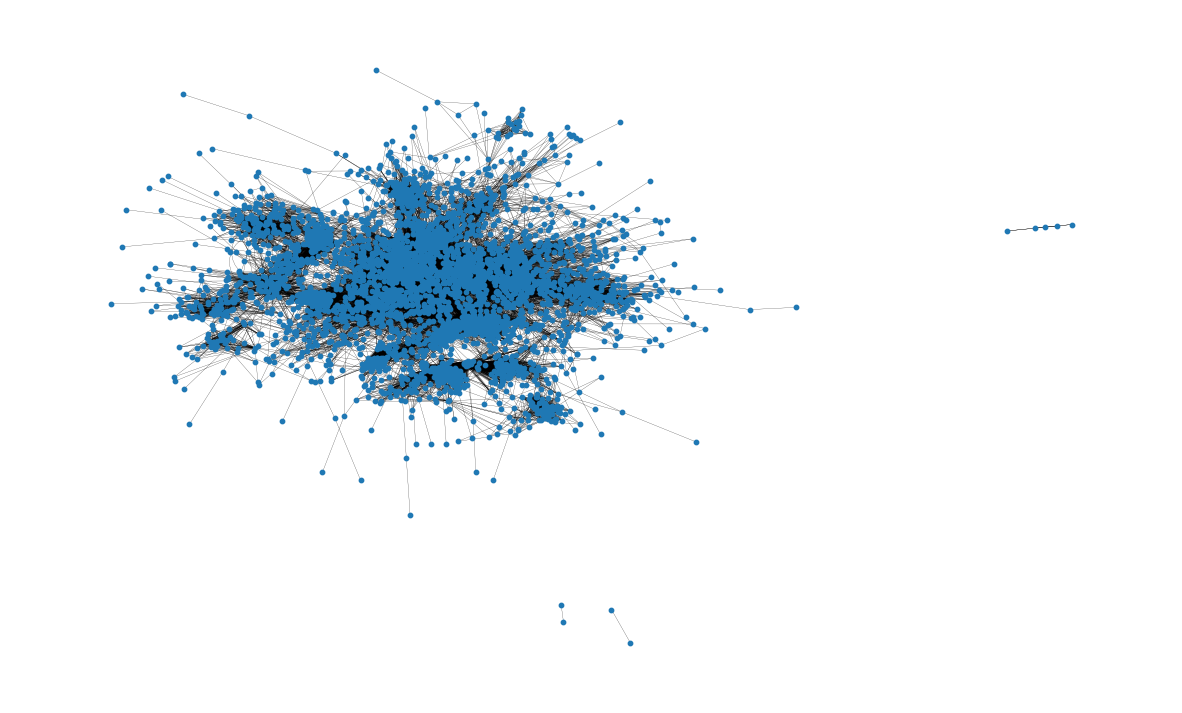

In [6]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [7]:
# Imprimir los nodos y los ejes que hay

print("Nodes in the graph:")
for node in G.nodes():
  print(node)
#print("Edges in the graph:")
#for edge in G.edges():
#  print(edge)

Nodes in the graph:
214328887
34428380
17116707
28465635
380580781
18996905
221036078
153460275
107830991
17868918
151338729
222261763
19705747
88323281
19933035
149538028
158419434
17434613
153226312
364971269
100581193
279787626
113058991
69592091
187773078
406628822
262802533
460282402
280935165
437804658
27633075
285312927
131613362
17675120
394263193
254839786
204317520
21548772
67864340
172883064
270449528
297801196
8088112
14925700
124528830
307458983
160237722
220368467
54228724
206923844
103598216
207594668
21146135
451250774
314316607
6581292
31331740
196327549
225444667
274153775
35415466
72818790
324201646
40981798
430268163
88097807
276308596
358775055
15023872
16870853
70492333
430313102
299715516
35359596
276577539
248883350
157829215
107511013
22462180
258140947
200559228
19493072
123371682
461410856
31414569
37699718
117901353
117674417
231238695
56860418
43003845
413275344
259842341
400689940
26929220
35148062
166214735
57490887
148519842
15150609
17759158
83943787
28

In [91]:
degree_dict = dict(G.degree())
sorted_degree = sorted(degree_dict.items(), key = lambda x: x[1], reverse = True)

# Imprimir los nodos con mayor grado
print("Nodos con mayor cantidad de conexiones:")
for node, degree in sorted_degree[:10]:  # Los 5 nodos con mayor grado
    print("Nodo:", node, "- Grado:", degree)

Nodos con mayor cantidad de conexiones:
Nodo: 48485771 - Grado: 303
Nodo: 5442012 - Grado: 294
Nodo: 3359851 - Grado: 284
Nodo: 40981798 - Grado: 270
Nodo: 43003845 - Grado: 256
Nodo: 34428380 - Grado: 243
Nodo: 22462180 - Grado: 242
Nodo: 15913 - Grado: 241
Nodo: 19802879 - Grado: 203
Nodo: 18927441 - Grado: 202


## **Shortest path**

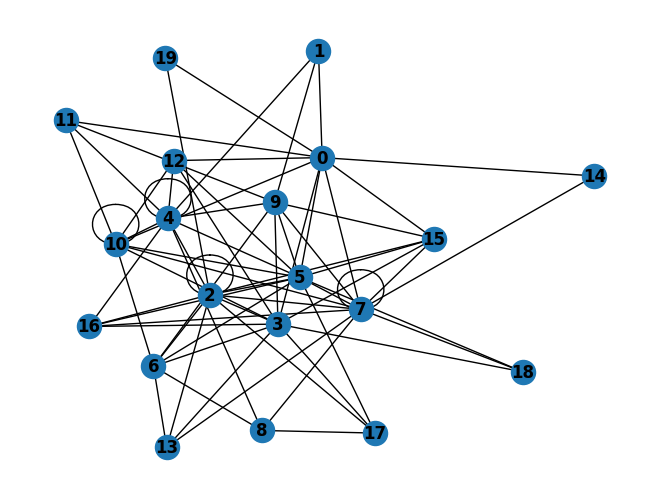

In [212]:
import networkx as nx
import random

def generar_grafo():
    G = nx.Graph()

    # Agregar 5 nodos al grafo
    nodos = {i: f"{i}" for i in range(20)}
    G.add_nodes_from(nodos)

    # Crear conexiones aleatorias entre los nodos
    for i in range(11):
        for _ in range(random.randint(0, 15)):  # Generar hasta 10 conexiones por nodo
            nodo_destino = random.choice(list(nodos.keys()))  # Elegir un nodo destino aleatorio
            G.add_edge(i, nodo_destino)

    return G

# Generar el grafo y visualizarlo
grafo = generar_grafo()
nx.draw(grafo, with_labels=True, font_weight='bold')

In [213]:
# Determinar los nodos de inicio y fin para encontrar el camino más corto
nodo_inicio = 0
nodo_fin = 19

# Encontrar el camino más corto entre los nodos de inicio y fin
camino_mas_corto = nx.shortest_path(grafo, source=nodo_inicio, target=nodo_fin)

print(f"El camino más corto entre el nodo {nodo_inicio} y el nodo {nodo_fin} es: {camino_mas_corto}")

El camino más corto entre el nodo 0 y el nodo 19 es: [0, 19]


In [214]:
path = nx.shortest_path(grafo,source=nodo_inicio,target=nodo_fin)
print(path)

[0, 19]


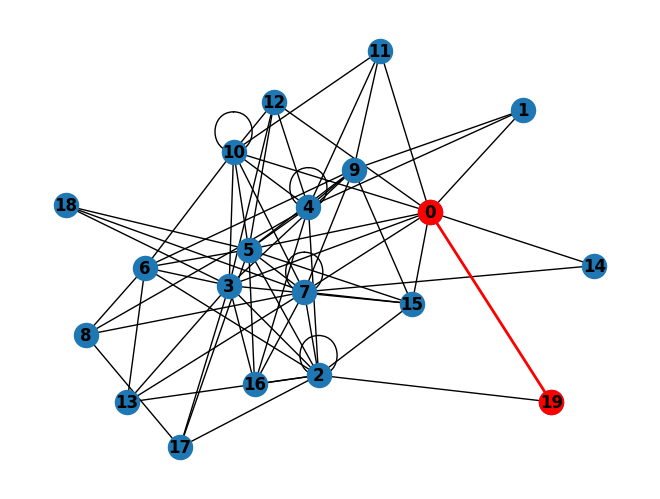

In [215]:
nodos = {i: f"{i}" for i in range(20)}
draw_enhanced_path(grafo, path, node_names=nodos,filename='shortest_path.png')

What other information can we extract from this network? ... (check graphs metrics)

## **Characteristic path lenght**

In [216]:
nx.average_shortest_path_length(grafo)

1.7263157894736842

## **Efficiency**

In [217]:
print(nx.global_efficiency(grafo))
print(nx.local_efficiency(grafo))

0.6578947368421058
0.5885557960557961


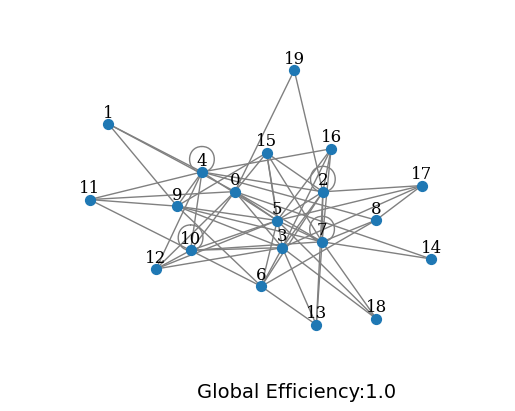

In [218]:
# higher efficiency
G = nx.complete_graph(n=20)

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(grafo,node_names=nodos,filename='efficiency.png')

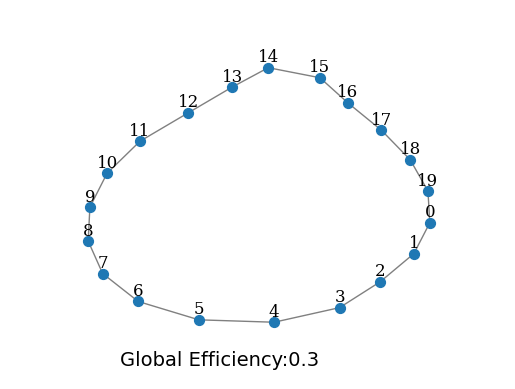

In [235]:
# lower efficiency
G = nx.cycle_graph(n=20)

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodos,filename='less_efficiency.png')

## **Clustering coefficient**

In [236]:
nx.average_clustering(grafo)

0.401969696969697

In [237]:
nx.clustering(grafo)

{0: 0.26666666666666666,
 1: 0.3333333333333333,
 2: 0.35555555555555557,
 3: 0.23636363636363636,
 4: 0.2777777777777778,
 5: 0.3484848484848485,
 6: 0.38095238095238093,
 7: 0.2545454545454545,
 8: 0,
 9: 0.32142857142857145,
 10: 0.4642857142857143,
 11: 0.5,
 12: 0.7,
 13: 0.6666666666666666,
 14: 1.0,
 15: 0.6666666666666666,
 16: 0.6,
 17: 0.3333333333333333,
 18: 0.3333333333333333,
 19: 0}

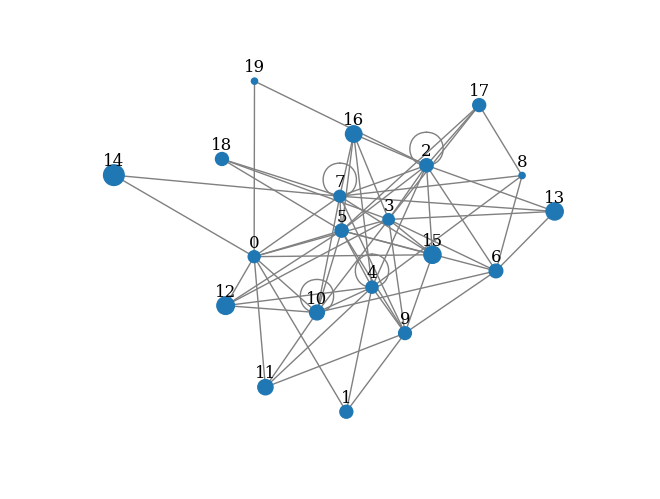

In [238]:
cc = nx.clustering(grafo)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(grafo, node_names=nodos, node_size=node_size,filename='clustering.png')

##**Centrality**

In [239]:
nx.degree_centrality(grafo)

{0: 0.5263157894736842,
 1: 0.15789473684210525,
 2: 0.631578947368421,
 3: 0.5789473684210527,
 4: 0.5789473684210527,
 5: 0.631578947368421,
 6: 0.3684210526315789,
 7: 0.6842105263157894,
 8: 0.21052631578947367,
 9: 0.42105263157894735,
 10: 0.5263157894736842,
 11: 0.21052631578947367,
 12: 0.2631578947368421,
 13: 0.21052631578947367,
 14: 0.10526315789473684,
 15: 0.3157894736842105,
 16: 0.2631578947368421,
 17: 0.21052631578947367,
 18: 0.15789473684210525,
 19: 0.10526315789473684}

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Degree centrality,0.526316,0.157895,0.631579,0.578947,0.578947,0.631579,0.368421,0.684211,0.210526,0.421053,0.526316,0.210526,0.263158,0.210526,0.105263,0.315789,0.263158,0.210526,0.157895,0.105263


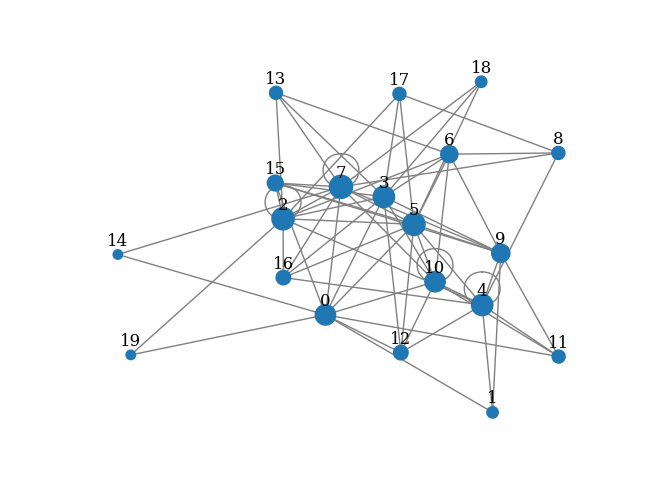

In [240]:
dc = nx.degree_centrality(grafo)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(grafo, node_names=nodos, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodos.values()
df

In [241]:
nx.closeness_centrality(grafo)

{0: 0.6785714285714286,
 1: 0.5,
 2: 0.6785714285714286,
 3: 0.7037037037037037,
 4: 0.6333333333333333,
 5: 0.7307692307692307,
 6: 0.59375,
 7: 0.7037037037037037,
 8: 0.5428571428571428,
 9: 0.6129032258064516,
 10: 0.6333333333333333,
 11: 0.5135135135135135,
 12: 0.5757575757575758,
 13: 0.5277777777777778,
 14: 0.48717948717948717,
 15: 0.59375,
 16: 0.5757575757575758,
 17: 0.5135135135135135,
 18: 0.5,
 19: 0.48717948717948717}

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Closeness centrality,0.678571,0.5,0.678571,0.703704,0.633333,0.730769,0.59375,0.703704,0.542857,0.612903,0.633333,0.513514,0.575758,0.527778,0.487179,0.59375,0.575758,0.513514,0.5,0.487179


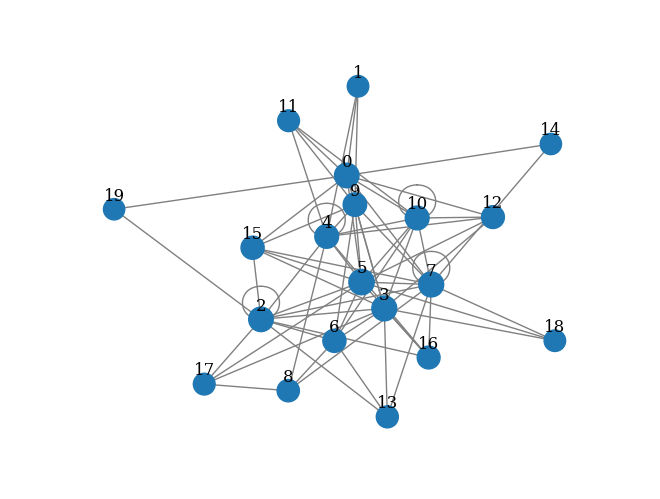

In [242]:
dc = nx.closeness_centrality(grafo)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(grafo, node_names=nodos, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodos.values()
df

In [243]:
nx.betweenness_centrality(grafo)

{0: 0.1329723720074597,
 1: 0.0031632110579479,
 2: 0.09322865243917873,
 3: 0.10379652835793185,
 4: 0.08488814629165507,
 5: 0.10120250120250118,
 6: 0.026153346328784924,
 7: 0.1376091744512797,
 8: 0.01231572196484477,
 9: 0.0520284296600086,
 10: 0.03022180873058066,
 11: 0.004137869927343611,
 12: 0.0034556087187666133,
 13: 0.002355425601039636,
 14: 0.0,
 15: 0.005409356725146199,
 16: 0.0039916710969342545,
 17: 0.00760233918128655,
 18: 0.0013157894736842105,
 19: 0.0011695906432748538}

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Betweenness centrality,0.132972,0.003163,0.093229,0.103797,0.084888,0.101203,0.026153,0.137609,0.012316,0.052028,0.030222,0.004138,0.003456,0.002355,0.0,0.005409,0.003992,0.007602,0.001316,0.00117


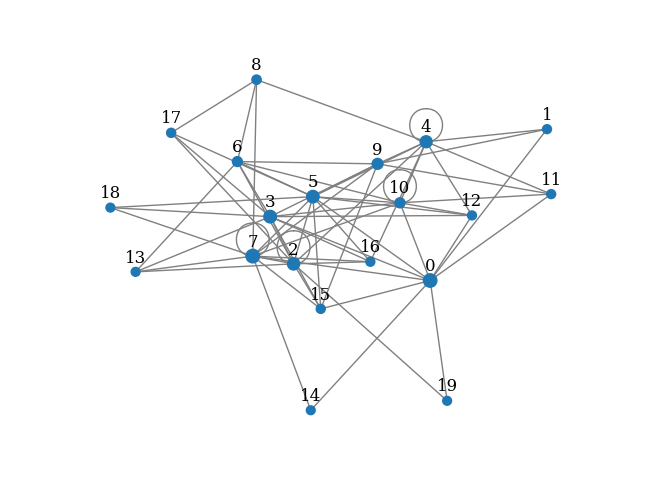

In [244]:
dc = nx.betweenness_centrality(grafo)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(grafo, node_names=nodos, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodos.values()
df

##**Assortativity**

In [229]:
nx.degree_pearson_correlation_coefficient(grafo)

-0.3747039132392381

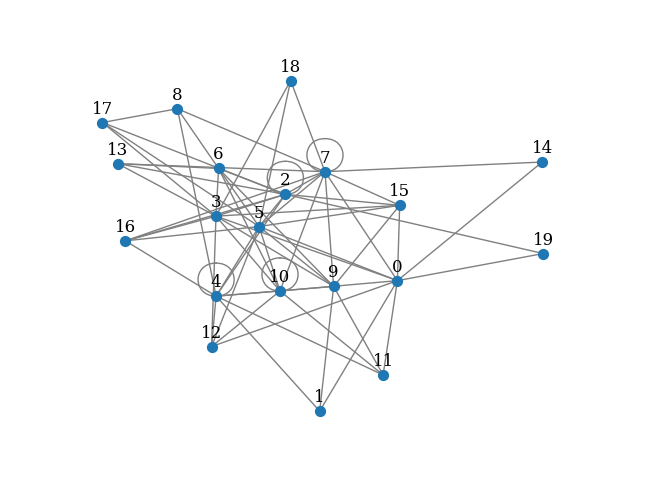

In [230]:
draw_graph(grafo, node_names=nodos,filename='assortativity.png')

##**Modularity**

In [245]:
import networkx.algorithms.community as nx_comm
# partitions can be provided manually
print(nx_comm.modularity(grafo, communities=[{0,1,2,3,4,5,6,7,8,9},{10,11,12,13,14,15,16,17,18,19}]))

# or automatically computed using networkx
print(nx_comm.modularity(grafo, nx_comm.label_propagation_communities(G)))

-0.1307309688581315
0.005406574394463654


##**Transitivity**

In [246]:
nx.transitivity(grafo)

0.3430493273542601